<a href="https://colab.research.google.com/github/aliyaaliyal/mesin-learning/blob/main/Latihan_Pengembangan_CNN_Model_Menggunakan_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Sebelum dilanjut kita harus set GPU di colab. caranya: klik Runtime - change runtime type - pada hardware accelerator pilih GPU - save

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

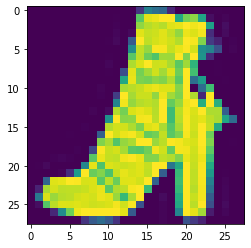

Image label: Ankle boot


In [7]:
#Grab an image from the test dataset
image = train_images[11]

plt.imshow(image)
plt.show()
print("Image label: " + class_names[train_labels[11]])

Normalisasi dataset

In [8]:
train_images = train_images / 255.0
test_image = test_image /255.0

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               147584    
                                                                 
 dense_1 (Dense)             (None, 10)                1

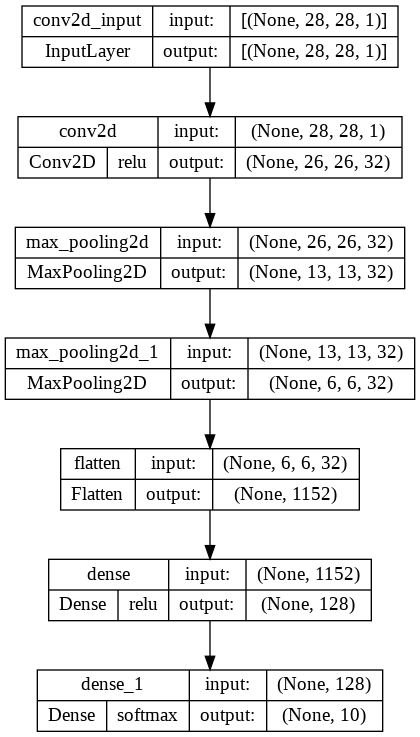

In [11]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_activations=True)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 14s 3ms/step - loss: 0.4644 - accuracy: 0.8333
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3289 - accuracy: 0.8813
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.8947
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2652 - accuracy: 0.9020
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2435 - accuracy: 0.9099
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2275 - accuracy: 0.9151
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2106 - accuracy: 0.9215
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1990 - accuracy: 0.9249
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1847 - accuracy: 0.9305
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1752 - accura

Evaluasi Model

In [18]:
test_loss, test_acc = model.evaluate(test_image, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.7341 - accuracy: 0.8934 - 807ms/epoch - 3ms/step

Test accuracy: 0.8934000134468079
